In [547]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  validation_curve
%matplotlib inline


In [548]:
train = pd.read_csv(r'C:\Users\kkluc\Python Code\Kaggle\Forest Cover Type/train.csv',index_col='Id')
test = pd.read_csv(r'C:\Users\kkluc\Python Code\Kaggle\Forest Cover Type/test.csv',index_col='Id')

In [549]:
print('train notnull:',train.isnull().sum().sum())
print('_'*20)
print('test notnull:',test.isnull().sum().sum())

#没有缺失值

train notnull: 0
____________________
test notnull: 0


In [550]:
print("The number of traning examples(data points) = %s " % train.shape[0])
print("The number of features we have = %i " % train.shape[1])

The number of traning examples(data points) = 15120 
The number of features we have = 55 


In [551]:
# 标签分布情况
train_y.value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [552]:
column=[x for x in train.columns if 'Soil_Type' not in x and 'Wilderness_Area' not in x ]
train[column].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.0,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.0,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.0,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.0,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.0,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.0,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.0,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.0,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.0,138.0,167.00,248.0
Horizontal_Distance_To_Fire_Points,15120.0,1511.147288,1099.936493,0.0,730.0,1256.0,1988.25,6993.0


In [553]:
column

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Cover_Type']

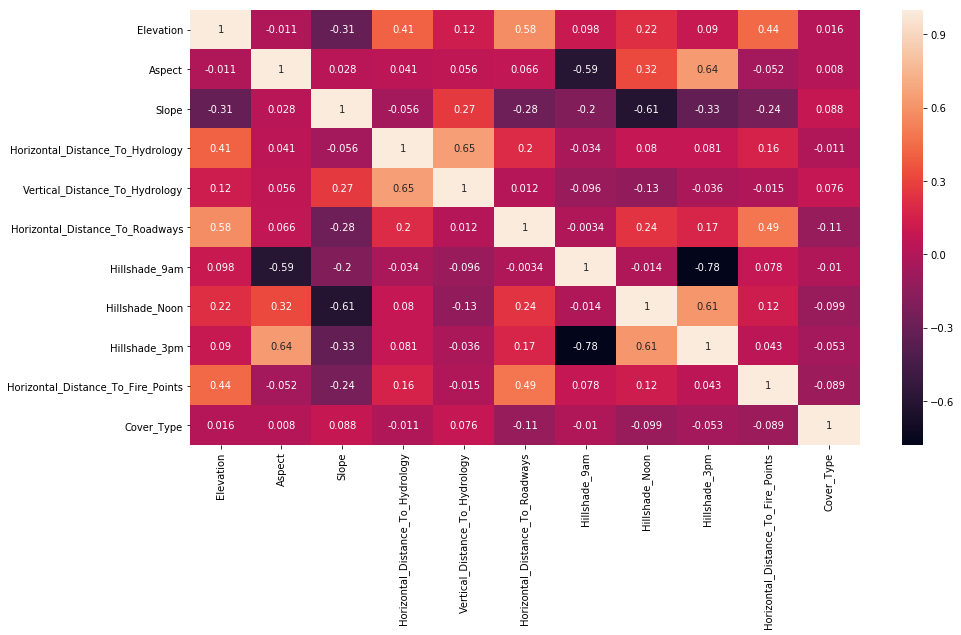

In [554]:

corr = train[column].corr()
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr,annot=True)
plt.show()
#Soil_Type7,15对输出没有关联 考虑删除

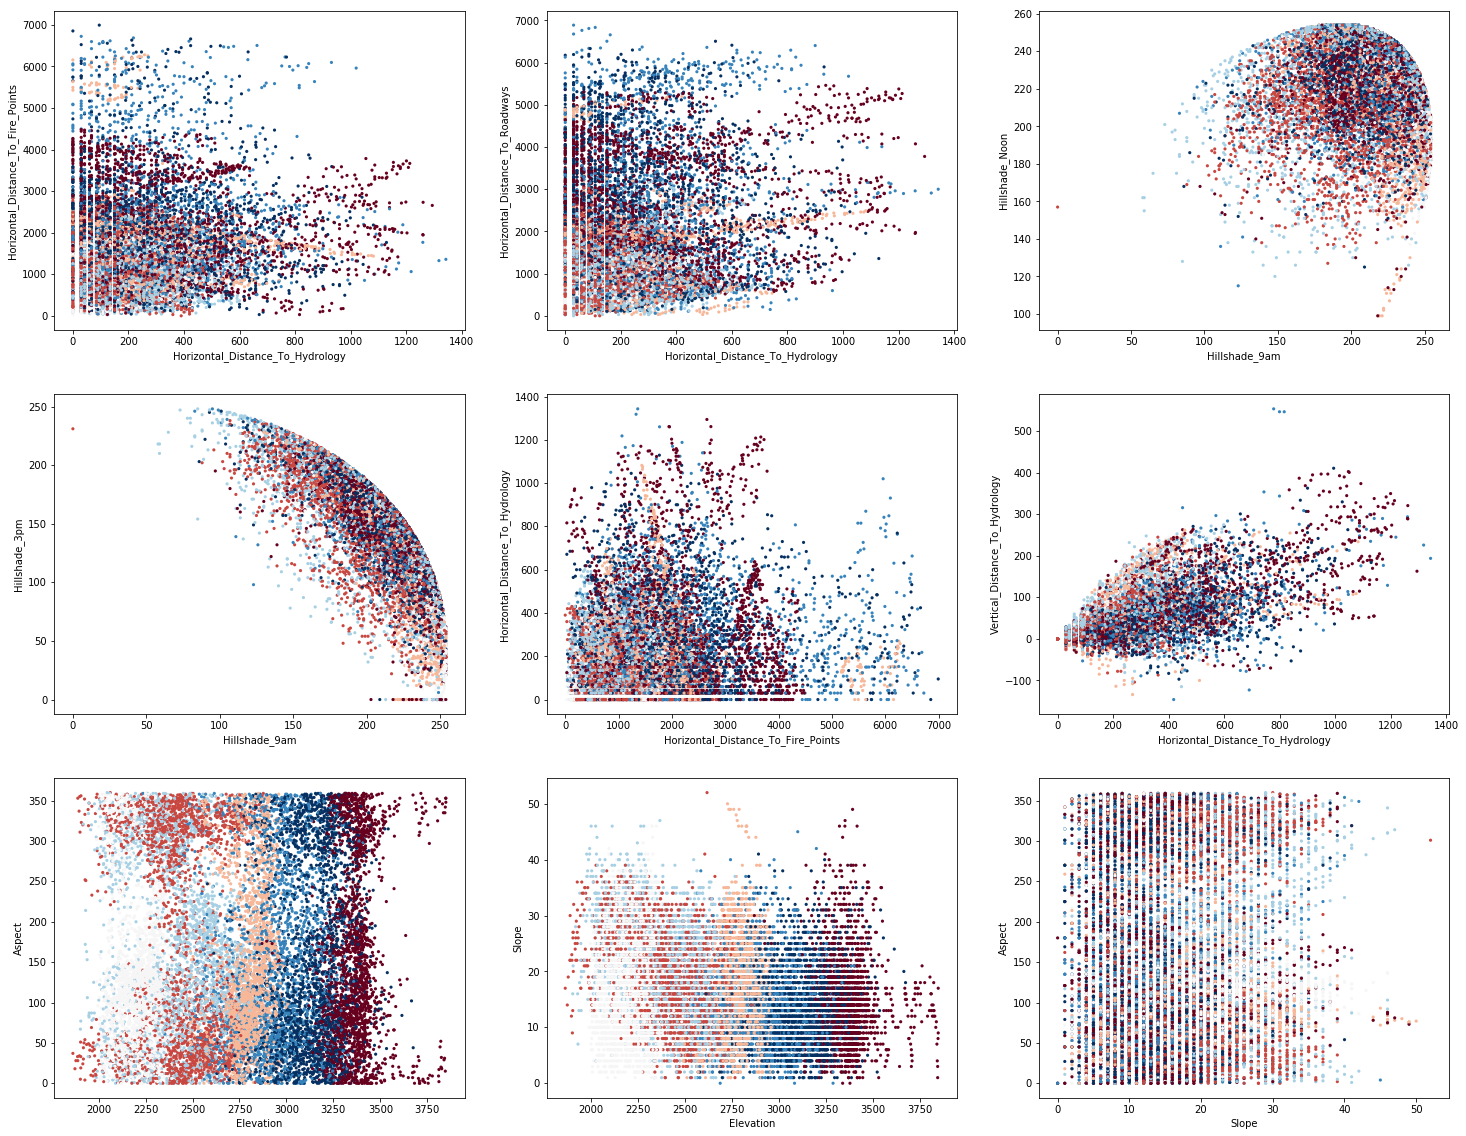

In [555]:
classes = np.array(list(train.Cover_Type.values))

def plotRelation(x, y):
    
    plt.scatter(x, y, c =classes,s=10,cmap=plt.cm.RdBu_r,edgecolor='none') #cmap指定颜色
    
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
f = plt.figure(figsize=(25,20))
f.add_subplot(331)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Fire_Points)

f.add_subplot(332)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Roadways)

f.add_subplot(333)
plotRelation(train.Hillshade_9am, train.Hillshade_Noon)

f.add_subplot(334)
plotRelation(train.Hillshade_9am, train.Hillshade_3pm)

f.add_subplot(335)
plotRelation(train.Horizontal_Distance_To_Fire_Points, train.Horizontal_Distance_To_Hydrology)

f.add_subplot(336)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Vertical_Distance_To_Hydrology)

f.add_subplot(337)
plotRelation(train.Elevation, train.Aspect)

f.add_subplot(338)
plotRelation(train.Elevation, train.Slope)

f.add_subplot(339)
plotRelation(train.Slope, train.Aspect)

In [556]:
for data in [train,test]:
    # train.head()
    data['HorizontalHydrology_HorizontalFire'] = (data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Fire_Points'])
    data['Neg_HorizontalHydrology_HorizontalFire'] = (data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Fire_Points'])
    
    data['HorizontalHydrology_HorizontalRoadways'] = (data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways'])
    data['Neg_HorizontalHydrology_HorizontalRoadways'] = (data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Roadways'])
    
    data['HorizontalFire_Points_HorizontalRoadways'] = (data['Horizontal_Distance_To_Fire_Points']+data['Horizontal_Distance_To_Roadways'])
    data['Neg_HorizontalFire_Points_HorizontalRoadways'] = (data['Horizontal_Distance_To_Fire_Points']-data['Horizontal_Distance_To_Roadways'])

    data['Neg_Elevation_Vertical'] = data['Elevation']-data['Vertical_Distance_To_Hydrology']
    data['Elevation_Vertical'] = data['Elevation']+data['Vertical_Distance_To_Hydrology']

    data['mean_hillshade'] =  (data['Hillshade_9am']  + data['Hillshade_Noon'] + data['Hillshade_3pm'] ) / 3

    data['Mean_HorizontalHydrology_HorizontalFire'] = (data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Fire_Points'])/2
    data['Mean_HorizontalHydrology_HorizontalRoadways'] = (data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways'])/2
    data['Mean_HorizontalFire_Points_HorizontalRoadways'] = (data['Horizontal_Distance_To_Fire_Points']+data['Horizontal_Distance_To_Roadways'])/2

    data['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Fire_Points'])/2
    data['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Roadways'])/2
    data['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (data['Horizontal_Distance_To_Fire_Points']-data['Horizontal_Distance_To_Roadways'])/2

    data['Slope2'] = np.sqrt(data['Horizontal_Distance_To_Hydrology']**2+data['Vertical_Distance_To_Hydrology']**2)
    
    data['Mean_Fire_Hydrology_Roadways']=(data['Horizontal_Distance_To_Fire_Points'] + data['Horizontal_Distance_To_Hydrology'] + data['Horizontal_Distance_To_Roadways']) / 3
    data['Mean_Fire_Hyd']=(data['Horizontal_Distance_To_Fire_Points'] + data['Horizontal_Distance_To_Hydrology']) / 2 

    data["Vertical_Distance_To_Hydrology"] = abs(data['Vertical_Distance_To_Hydrology'])

    data['Neg_EHDtH'] = data['Elevation']-data['Horizontal_Distance_To_Hydrology']
    
    data['9am_noon']=data['Hillshade_Noon']-data['Hillshade_9am']
    data['3pm_noon']=data['Hillshade_Noon']-data['Hillshade_3pm']
    data['9am_3pm']=data['Hillshade_9am']-data['Hillshade_3pm']
    
    data["Slope*Elevation"] = data["Slope"] * data["Elevation"]
    
    data["Aspect*Elevation"] = data["Aspect"] * data["Elevation"]


In [558]:
#考虑将峰度进行降低
columnss=[x for x in train.columns if 'Soil_Type' not in x and 'Wilderness_Area' not in x and 'Cover_Type' not in x ]
skew={}
name1=[]
feature=[]
value=[]
for i in columnss:
    for name,data in zip(["train","test"],[train_x,test]):
        name1.append(name)
        feature.append(data[i].name)
        value.append(data[i].skew())


skew=pd.DataFrame({'name':name1,"feature":feature,"value":value})
skew=skew.sort_values('value',ascending=False)




In [559]:
skew

,name,feature,value
9,test,Vertical_Distance_To_Hydrology,2.083194
8,train,Vertical_Distance_To_Hydrology,1.696227
18,train,Horizontal_Distance_To_Fire_Points,1.617099
6,train,Horizontal_Distance_To_Hydrology,1.488052
54,train,Mean_Fire_Hyd,1.464818
20,train,HorizontalHydrology_HorizontalFire,1.464818
38,train,Mean_HorizontalHydrology_HorizontalFire,1.464818
50,train,Slope2,1.442072
42,train,Mean_HorizontalFire_Points_HorizontalRoadways,1.301516
28,train,HorizontalFire_Points_HorizontalRoadways,1.301516


In [577]:
for data in [train,test]:
    data['Vertical_Distance_To_Hydrology']=np.log1p(data['Vertical_Distance_To_Hydrology'])
    data['Horizontal_Distance_To_Fire_Points']=np.log1p(data['Horizontal_Distance_To_Fire_Points'])
    data['Mean_Fire_Hyd']=np.log1p(data['Mean_Fire_Hyd'])
    data['HorizontalHydrology_HorizontalFire']=np.log1p(data['HorizontalHydrology_HorizontalFire'])
    data['Mean_HorizontalHydrology_HorizontalFire']=np.log1p(data['Mean_HorizontalHydrology_HorizontalFire'])

In [579]:
train_x=train.drop('Cover_Type',axis=1)
train_y=train.Cover_Type

In [580]:
columnss=[x for x in train_x.columns if 'Soil_Type' not in x and 'Wilderness_Area' not in x ]

In [582]:
from sklearn.preprocessing import MinMaxScaler

std=MinMaxScaler()
std.fit(train_x[columnss])
train_x[columnss]=std.fit_transform(train_x[columnss])
test[columnss]=std.transform(test[columnss])


In [584]:
train_x.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHDtH,9am_noon,3pm_noon,9am_3pm,Slope*Elevation,Aspect*Elevation
Id,,,,,,,,,,,,,,,,,,,,,
1,0.369084,0.141667,0.057692,0.192107,0.000000,0.074020,0.870079,0.858065,0.596774,0.987836,...,0.983717,0.190134,0.534547,0.983003,0.414083,0.476703,0.492212,0.626804,0.046843,0.097443
2,0.366062,0.155556,0.038462,0.157856,0.307947,0.056604,0.866142,0.877419,0.608871,0.986861,...,0.989228,0.156296,0.517582,0.980156,0.435102,0.491039,0.492212,0.618557,0.031157,0.106749
3,0.473817,0.386111,0.173077,0.199553,0.663028,0.461538,0.921260,0.896774,0.544355,0.984958,...,0.747578,0.203229,0.729025,0.978773,0.518129,0.451613,0.551402,0.680412,0.151789,0.286860
4,0.464250,0.430556,0.346154,0.180194,0.756314,0.448476,0.937008,0.896774,0.491935,0.986607,...,0.762609,0.198414,0.727020,0.980614,0.521808,0.437276,0.591900,0.715464,0.301521,0.317712
5,0.368580,0.125000,0.038462,0.113924,0.109693,0.056749,0.866142,0.870968,0.604839,0.985895,...,0.984719,0.112756,0.509022,0.976913,0.468734,0.487455,0.492212,0.620619,0.031217,0.085946


In [585]:
test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHDtH,9am_noon,3pm_noon,9am_3pm,Slope*Elevation,Aspect*Elevation
Id,,,,,,,,,,,,,,,,,,,,,
15121,0.411380,0.983333,0.269231,0.0,0.0,0.389550,0.771654,0.741935,0.629032,0.994235,...,0.832749,0.0,0.710518,0.986030,0.593799,0.501792,0.411215,0.558763,0.225675,0.698257
15122,0.412890,0.000000,0.250000,0.0,0.0,0.385196,0.791339,0.754839,0.612903,0.994744,...,0.837759,0.0,0.710518,0.986862,0.595376,0.491039,0.429907,0.577320,0.209790,0.000000
15123,0.427996,0.044444,0.288462,0.0,0.0,0.432511,0.811024,0.703226,0.552419,0.988999,...,0.782899,0.0,0.710133,0.977467,0.611140,0.444444,0.451713,0.618557,0.244772,0.031948
15124,0.425982,0.066667,0.326923,0.0,0.0,0.428157,0.818898,0.658065,0.504032,0.989532,...,0.787909,0.0,0.710133,0.978339,0.609038,0.412186,0.467290,0.647423,0.276999,0.047852
15125,0.424471,0.080556,0.365385,0.0,0.0,0.423803,0.826772,0.619355,0.463710,0.990063,...,0.792919,0.0,0.710133,0.979206,0.607462,0.383513,0.479751,0.672165,0.309244,0.057757


# 特征选择

In [593]:
#RFE 方法选择特征
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe=RFE(RandomForestClassifier(),n_features_to_select=1)

rfe.fit_transform(train_x,train_y)

sorted(zip(map(lambda x:round(x,4),rfe.ranking_),train_x.columns))

[(1, 'Neg_Elevation_Vertical'),
 (2, 'Elevation'),
 (3, 'Mean_HorizontalFire_Points_HorizontalRoadways'),
 (4, 'Elevation_Vertical'),
 (5, 'Neg_EHDtH'),
 (6, 'MeanNeg_HorizontalHydrology_HorizontalRoadways'),
 (7, 'Aspect'),
 (8, 'Neg_HorizontalFire_Points_HorizontalRoadways'),
 (9, 'Hillshade_9am'),
 (10, 'Slope2'),
 (11, 'Mean_HorizontalHydrology_HorizontalRoadways'),
 (12, 'Mean_Fire_Hydrology_Roadways'),
 (13, 'MeanNeg_HorizontalFire_Points_HorizontalRoadways'),
 (14, 'Aspect*Elevation'),
 (15, 'Neg_HorizontalHydrology_HorizontalRoadways'),
 (16, 'HorizontalFire_Points_HorizontalRoadways'),
 (17, 'Mean_HorizontalHydrology_HorizontalFire'),
 (18, 'Vertical_Distance_To_Hydrology'),
 (19, 'mean_hillshade'),
 (20, 'MeanNeg_Mean_HorizontalHydrology_HorizontalFire'),
 (21, '3pm_noon'),
 (22, 'Hillshade_Noon'),
 (23, 'HorizontalHydrology_HorizontalFire'),
 (24, 'HorizontalHydrology_HorizontalRoadways'),
 (25, 'Horizontal_Distance_To_Roadways'),
 (26, 'Mean_Fire_Hyd'),
 (27, 'Horizontal_Di

In [595]:
#利用Rf进行筛选

RF=RandomForestClassifier()

RF.fit(train_x,train_y)

feature_importance=pd.DataFrame()

feature_importance['feature']=train_x.columns
feature_importance['importance']=RF.feature_importances_
feature_importance.sort_values('importance',ascending=False)


,feature,importance
0,Elevation,0.098028
60,Neg_Elevation_Vertical,0.093126
72,Neg_EHDtH,0.060742
61,Elevation_Vertical,0.059331
56,HorizontalHydrology_HorizontalRoadways,0.036366
65,Mean_HorizontalFire_Points_HorizontalRoadways,0.036231
70,Mean_Fire_Hydrology_Roadways,0.031296
69,Slope2,0.028471
13,Wilderness_Area4,0.026649
4,Vertical_Distance_To_Hydrology,0.025781


In [606]:
#利用正则化进行选择特征
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
lsvc=LinearSVC(C=1.4,penalty='l1',dual=False).fit(train_x,train_y)
model=SelectFromModel(lsvc,prefit=True)
x_new_train=model.transform(train_x)

x_new_test=model.transform(test)
 #选出l1正则化权重不为0 的特征,输出的为特征系数不为0的矩阵

In [542]:
from sklearn.decomposition import PCA

pca=PCA()
x=pca.fit_transform(train_x)

array([[ 8.11700272e-01,  1.23134880e+00,  2.02683124e-01, ...,
        -1.10598473e-16,  3.12085445e-15, -9.85351202e-16],
       [ 7.85302108e-01,  1.21747198e+00,  1.91763307e-01, ...,
         2.35504962e-17, -1.97377706e-16,  6.05354710e-16],
       [ 1.22480612e+00,  1.11141197e+00, -1.98579827e-01, ...,
        -1.45282237e-17, -3.94336100e-16, -1.53561334e-16],
       ...,
       [-1.69460133e-01, -6.94430118e-01,  6.17873162e-01, ...,
        -4.96289083e-17,  1.07386304e-16,  2.09991845e-17],
       [-2.12229554e-01, -7.66673411e-01,  4.12864165e-01, ...,
         6.08418045e-17,  4.42071976e-17,  8.67915312e-18],
       [-2.21912903e-01, -7.85960732e-01,  1.27327633e-01, ...,
         2.50478843e-17,  4.95182298e-19, -4.36110303e-17]])

In [599]:
pca.explained_variance_ratio_.cumsum()

array([0.24715984, 0.39497396, 0.48298515, 0.53373631, 0.58042773,
       0.61834127, 0.65355782, 0.68362826, 0.71055424, 0.73269316,
       0.75309781, 0.77232537, 0.79067902, 0.80781742, 0.82405599,
       0.83996322, 0.85454335, 0.86875985, 0.88187871, 0.89363299,
       0.90454154, 0.91448031, 0.92402629, 0.93321556, 0.94194542,
       0.9494955 , 0.95674873, 0.96311932, 0.96840023, 0.97268542,
       0.97684671, 0.98029643, 0.98359859, 0.98654142, 0.98935358,
       0.991099  , 0.99270864, 0.99412576, 0.99542715, 0.99658445,
       0.99737989, 0.99795008, 0.99836608, 0.9987516 , 0.99903196,
       0.99929872, 0.9995469 , 0.99977665, 0.99987142, 0.99992121,
       0.99994831, 0.99997411, 0.99999847, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

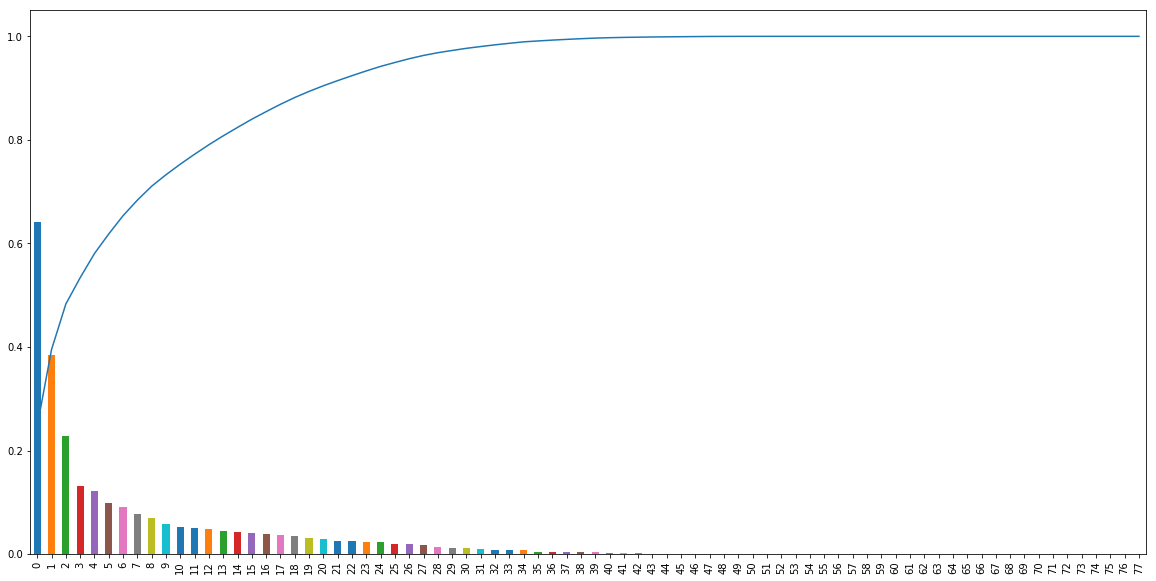

In [605]:
plt.figure(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_.cumsum())
pd.Series(pca.explained_variance_).plot(kind='bar')
plt.show()

In [617]:
#利用PCA 进行特征选择
pca=PCA(n_components=35).fit(train_x)
train_x=pca.transform(train_x)
test_x=pca.transform(test)

In [619]:
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid=train_test_split(train_x,train_y,test_size=0.2,stratify=train_y,random_state=0)

In [ ]:
def model(estimator):
    clf = estimator(n_estimators=550)

    clf.fit(x_train, y_train)
    print('Accuracy of model on training set: {:.2f}'.format(clf.score(x_train, y_train) * 100))
    print('Accuracy of model on valid set: {:.2f}'.format(clf.score(x_valid, y_valid) * 100))
    
    from sklearn.metrics import confusion_matrix

    print('model classification_report')
    print(classification_report(clf.predict(x_valid),y_valid))
    print('_'*30)
    print('model confusion_matrix')
    print(confusion_matrix(clf.predict(x_valid),y_valid))
    print('_'*30)
    print('model accuracy')
    print(accuracy_score(clf.predict(x_valid),y_valid))
    print('_'*30)
    plt.figure(figsize=(10,6))
    sns.heatmap(confusion_matrix(clf.predict(x_valid),y_valid),annot=True,cmap=plt.cm.Blues_r)
    plt.show()


Accuracy of model on training set: 100.00
Accuracy of model on valid set: 84.46
ExtraTreesClassifier classification_report
             precision    recall  f1-score   support

          1       0.74      0.77      0.75       414
          2       0.67      0.77      0.72       378
          3       0.81      0.81      0.81       428
          4       0.95      0.92      0.93       448
          5       0.93      0.88      0.91       456
          6       0.84      0.80      0.82       452
          7       0.97      0.94      0.95       448

avg / total       0.85      0.84      0.85      3024

______________________________
ExtraTreesClassifier confusion_matrix
[[318  79   0   0   6   0  11]
 [ 76 291   3   0   6   1   1]
 [  0  14 348  14   2  50   0]
 [  0   0  21 411   0  16   0]
 [ 11  34   6   0 403   2   0]
 [  0  13  54   7  15 363   0]
 [ 27   1   0   0   0   0 420]]
______________________________
ExtraTreesClassifier accuracy
0.8445767195767195
______________________________

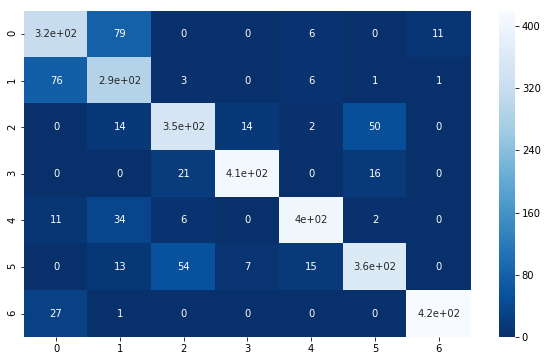

In [669]:
model(ExtraTreesClassifier)

# RF model

In [651]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy of model on training set: 100.00
Accuracy of model on valid set: 84.39
ExtraTreesClassifier classification_report
             precision    recall  f1-score   support

          1       0.77      0.78      0.77       426
          2       0.67      0.78      0.72       371
          3       0.79      0.78      0.79       437
          4       0.95      0.92      0.93       444
          5       0.93      0.87      0.90       459
          6       0.83      0.81      0.82       442
          7       0.97      0.94      0.96       445

avg / total       0.85      0.84      0.85      3024

______________________________
ExtraTreesClassifier confusion_matrix
[[331  78   0   0   4   0  13]
 [ 64 290   2   0  13   2   0]
 [  1  14 343  18   3  58   0]
 [  0   0  23 409   0  12   0]
 [ 11  35  11   0 401   1   0]
 [  0  14  53   5  11 359   0]
 [ 25   1   0   0   0   0 419]]
______________________________
ExtraTreesClassifier accuracy
0.843915343915344
______________________________


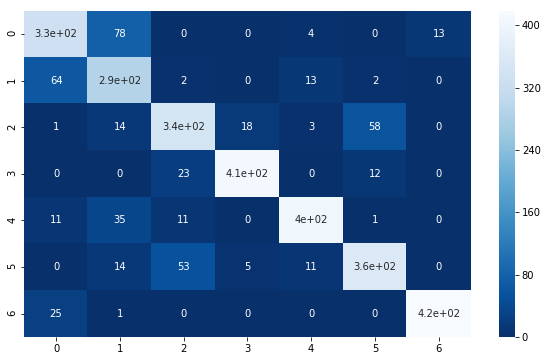

In [661]:
model(RandomForestClassifier)

# GBDT model

In [658]:
from sklearn.ensemble import GradientBoostingClassifier

In [659]:
GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Accuracy of model on training set: 98.26
Accuracy of model on valid set: 81.28
ExtraTreesClassifier classification_report
             precision    recall  f1-score   support

          1       0.73      0.76      0.74       414
          2       0.63      0.72      0.67       378
          3       0.73      0.75      0.74       418
          4       0.93      0.92      0.93       437
          5       0.91      0.83      0.86       475
          6       0.81      0.76      0.78       458
          7       0.97      0.94      0.95       444

avg / total       0.82      0.81      0.82      3024

______________________________
ExtraTreesClassifier confusion_matrix
[[314  82   0   0   3   0  15]
 [ 79 271   3   0  23   2   0]
 [  1  13 314  19   5  66   0]
 [  0   0  23 402   0  12   0]
 [ 15  45  19   0 392   4   0]
 [  0  17  73  11   9 348   0]
 [ 23   4   0   0   0   0 417]]
______________________________
ExtraTreesClassifier accuracy
0.8128306878306878
______________________________


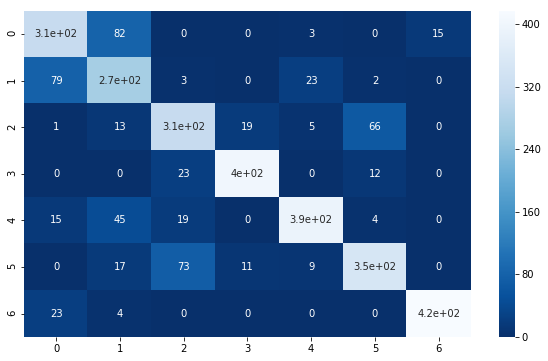

In [660]:
model(GradientBoostingClassifier)

# XGboost 算法

In [672]:
from xgboost import XGBClassifier

Accuracy of model on training set: 94.40
Accuracy of model on valid set: 81.58
ExtraTreesClassifier classification_report
             precision    recall  f1-score   support

          1       0.74      0.73      0.74       436
          2       0.59      0.73      0.65       354
          3       0.74      0.77      0.75       413
          4       0.95      0.92      0.94       444
          5       0.92      0.83      0.87       476
          6       0.81      0.76      0.78       461
          7       0.96      0.94      0.95       440

avg / total       0.82      0.82      0.82      3024

______________________________
ExtraTreesClassifier confusion_matrix
[[320  97   0   0   2   0  17]
 [ 72 257   4   0  19   2   0]
 [  1  14 318  16   2  62   0]
 [  0   0  21 410   0  13   0]
 [ 15  46  13   0 397   5   0]
 [  0  17  76   6  12 350   0]
 [ 24   1   0   0   0   0 415]]
______________________________
ExtraTreesClassifier accuracy
0.8158068783068783
______________________________


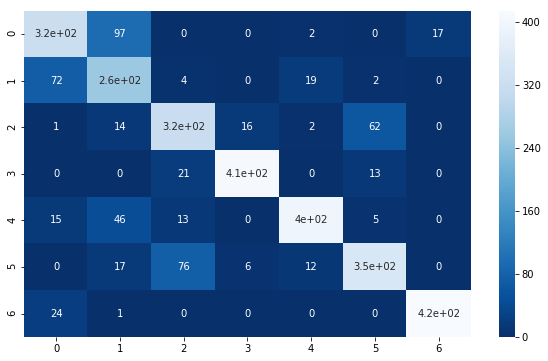

In [673]:
model(XGBClassifier)

In [ ]:
xgboost=XGBClassifier()
eval_set=[(x_train,y_train)]
xgboost.fit(x_train,y_train,early_stopping_rounds=10,eval_set=eval_set,verbose=True)
y_pred_xgboost=xgboost.predict(x_valid)


# evaluate predictions
accuracy = accuracy_score(y_valid, y_pred_xgboost)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Lgbt 算法

In [674]:
from lightgbm import LGBMClassifier

Accuracy of model on training set: 100.00
Accuracy of model on valid set: 84.99
ExtraTreesClassifier classification_report
             precision    recall  f1-score   support

          1       0.78      0.79      0.78       425
          2       0.68      0.78      0.73       373
          3       0.80      0.82      0.81       424
          4       0.95      0.92      0.94       444
          5       0.94      0.86      0.90       471
          6       0.84      0.81      0.82       444
          7       0.97      0.95      0.96       443

avg / total       0.86      0.85      0.85      3024

______________________________
ExtraTreesClassifier confusion_matrix
[[336  77   0   0   0   0  12]
 [ 62 292   5   0  12   2   0]
 [  0  11 346  15   3  49   0]
 [  0   0  19 410   0  15   0]
 [ 13  38  10   0 405   5   0]
 [  0  12  52   7  12 361   0]
 [ 21   2   0   0   0   0 420]]
______________________________
ExtraTreesClassifier accuracy
0.8498677248677249
______________________________

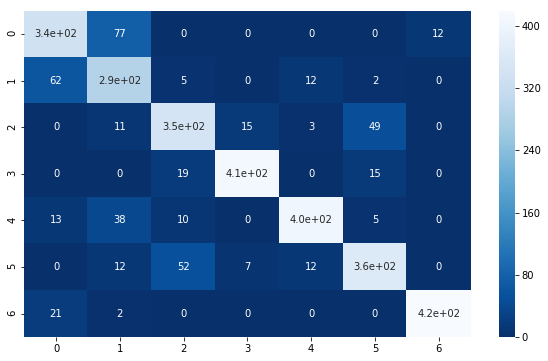

In [680]:
model(LGBMClassifier)

# VotingClassifier 集成投票算法


In [681]:
from sklearn.ensemble import VotingClassifier


In [690]:
vot=VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=500)),
                                 ('extra', ExtraTreesClassifier(n_estimators=500)),
                                ('gbdt',GradientBoostingClassifier(n_estimators=500)),
                                 ('XGBoost',XGBClassifier(n_estimators=500)),
                                ('lgbt',LGBMClassifier(n_estimators=500))], voting='soft')
vot.fit(x_train,y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...da=0,
        seed=0, silent=True, subsample=1, subsample_for_bin=50000,
        subsample_freq=1))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [692]:
vot.score(x_valid,y_valid)

0.845568783068783

Accuracy of model on training set: 100.00
Accuracy of model on valid set: 84.56
model classification_report
             precision    recall  f1-score   support

          1       0.77      0.79      0.78       422
          2       0.67      0.78      0.72       371
          3       0.79      0.80      0.80       426
          4       0.95      0.93      0.94       442
          5       0.93      0.86      0.89       469
          6       0.83      0.80      0.82       451
          7       0.97      0.95      0.96       443

avg / total       0.85      0.85      0.85      3024

______________________________
model confusion_matrix
[[333  75   0   0   2   0  12]
 [ 63 290   5   0  12   1   0]
 [  0  14 342  14   3  53   0]
 [  0   0  19 409   0  14   0]
 [ 14  39   9   0 403   4   0]
 [  0  13  57   9  12 360   0]
 [ 22   1   0   0   0   0 420]]
______________________________
model accuracy
0.845568783068783
______________________________


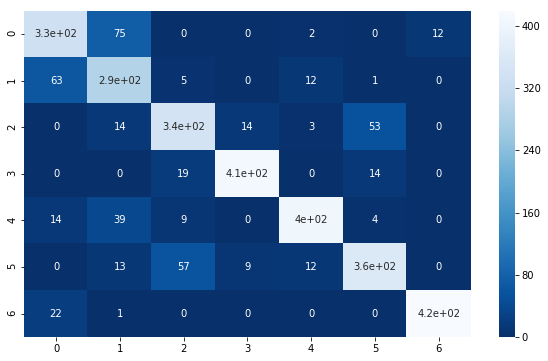

In [693]:
print('Accuracy of model on training set: {:.2f}'.format(vot.score(x_train, y_train) * 100))
print('Accuracy of model on valid set: {:.2f}'.format(vot.score(x_valid, y_valid) * 100))
    
from sklearn.metrics import confusion_matrix

print('model classification_report')
print(classification_report(vot.predict(x_valid),y_valid))
print('_'*30)
print('model confusion_matrix')
print(confusion_matrix(vot.predict(x_valid),y_valid))
print('_'*30)
print('model accuracy')
print(accuracy_score(vot.predict(x_valid),y_valid))
print('_'*30)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(vot.predict(x_valid),y_valid),annot=True,cmap=plt.cm.Blues_r)
plt.show()


In [695]:
vot=VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=500)),
                                 ('extra', ExtraTreesClassifier(n_estimators=500)),
                                ('gbdt',GradientBoostingClassifier(n_estimators=500)),
                                 ('XGBoost',XGBClassifier(n_estimators=500)),
                                ('lgbt',LGBMClassifier(n_estimators=500))], voting='hard')
vot.fit(x_train,y_train)


VotingClassifier(estimators=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...da=0,
        seed=0, silent=True, subsample=1, subsample_for_bin=50000,
        subsample_freq=1))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

Accuracy of model on training set: 100.00
Accuracy of model on valid set: 84.59
model classification_report
             precision    recall  f1-score   support

          1       0.77      0.78      0.78       423
          2       0.67      0.78      0.72       374
          3       0.79      0.80      0.79       431
          4       0.95      0.92      0.93       446
          5       0.93      0.87      0.90       463
          6       0.83      0.81      0.82       442
          7       0.98      0.95      0.96       445

avg / total       0.85      0.85      0.85      3024

______________________________
model confusion_matrix
[[332  78   0   0   3   0  10]
 [ 65 291   5   0  12   1   0]
 [  1  14 343  14   3  56   0]
 [  0   0  21 410   0  15   0]
 [ 12  36  11   0 402   2   0]
 [  0  12  52   8  12 358   0]
 [ 22   1   0   0   0   0 422]]
______________________________
model accuracy
0.8458994708994709
______________________________


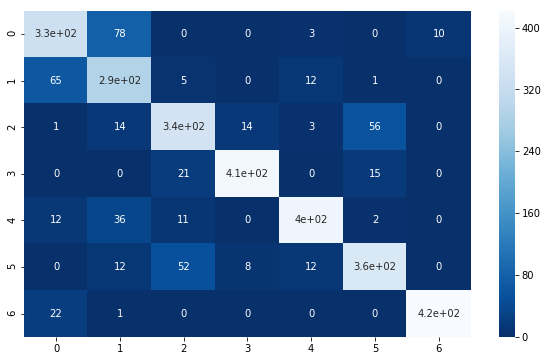

In [696]:
print('Accuracy of model on training set: {:.2f}'.format(vot.score(x_train, y_train) * 100))
print('Accuracy of model on valid set: {:.2f}'.format(vot.score(x_valid, y_valid) * 100))
    
from sklearn.metrics import confusion_matrix

print('model classification_report')
print(classification_report(vot.predict(x_valid),y_valid))
print('_'*30)
print('model confusion_matrix')
print(confusion_matrix(vot.predict(x_valid),y_valid))
print('_'*30)
print('model accuracy')
print(accuracy_score(vot.predict(x_valid),y_valid))
print('_'*30)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(vot.predict(x_valid),y_valid),annot=True,cmap=plt.cm.Blues_r)
plt.show()

In [697]:
y=vot.predict(test_x)
result4= pd.DataFrame({"Id": test.index,"Cover_Type": y})
result4.index=result4.Id
result4.drop('Id',axis=1,inplace=True)
result4.to_csv(r'C:\Users\kkluc\Python Code\Kaggle\Forest Cover Type/result20180826.csv')